In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
housing_data=pd.read_csv('housing.csv')

In [2]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Data Exploration

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

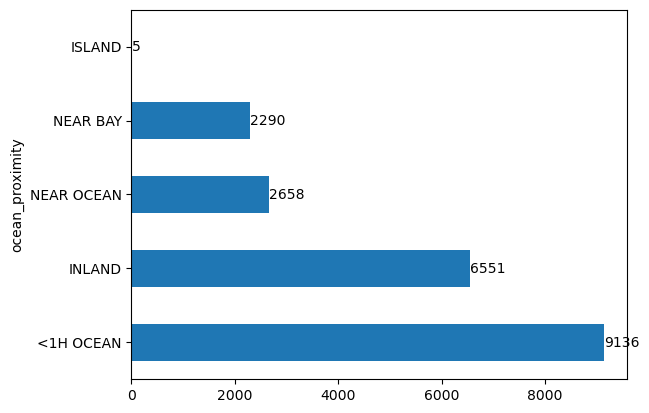

In [5]:
housing_data["ocean_proximity"].value_counts().plot(kind='barh')
for i, count in enumerate(housing_data["ocean_proximity"].value_counts()):
    plt.annotate(str(count), xy=(count, i), ha='left', va='center')


In [6]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

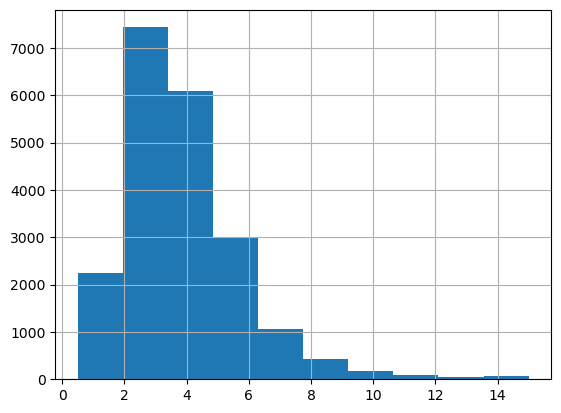

In [7]:
housing_data["median_income"].hist()

In [8]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                   bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
                                   labels=[1,2,3,4,5])

In [9]:
housing_data["income_cat"].value_counts().sort_index()

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

<Axes: >

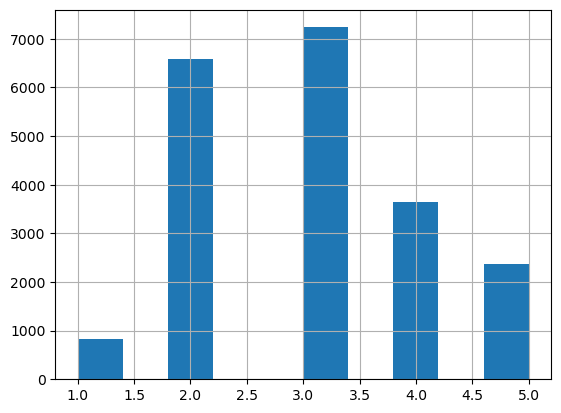

In [10]:
housing_data["income_cat"].hist()

In [11]:
y=housing_data["median_house_value"]
X=housing_data.drop("median_house_value",axis=1)

In [12]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


# split dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=15)

<Axes: >

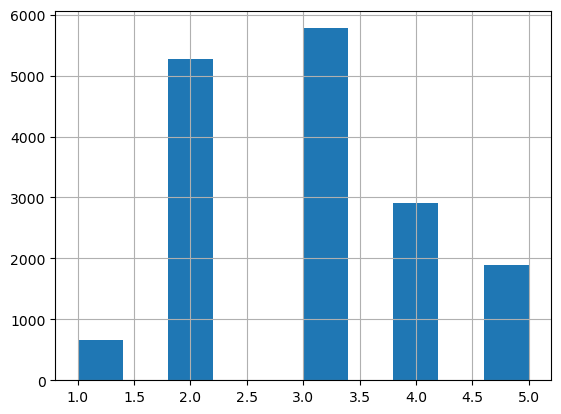

In [14]:
X_train["income_cat"].hist()

<Axes: >

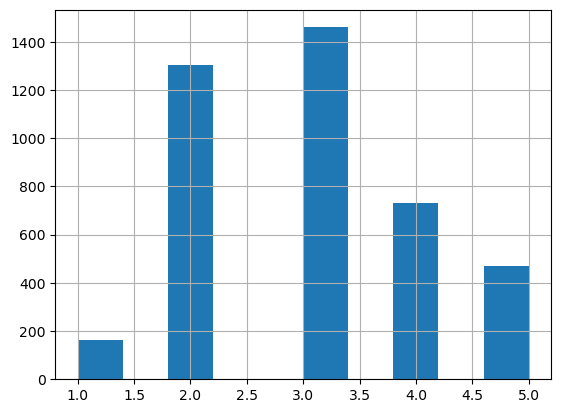

In [15]:
X_test["income_cat"].hist()

### startified split

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

sss= StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=15)
for train_index, test_index in sss.split(housing_data, housing_data["income_cat"]):
    strat_train_set=housing_data.loc[train_index]
    strat_test_set=housing_data.loc[test_index]

In [17]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [18]:
housing_data["income_cat"].value_counts()/len(housing_data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [19]:
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

# visulaising data

In [21]:
housing=strat_train_set.copy()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

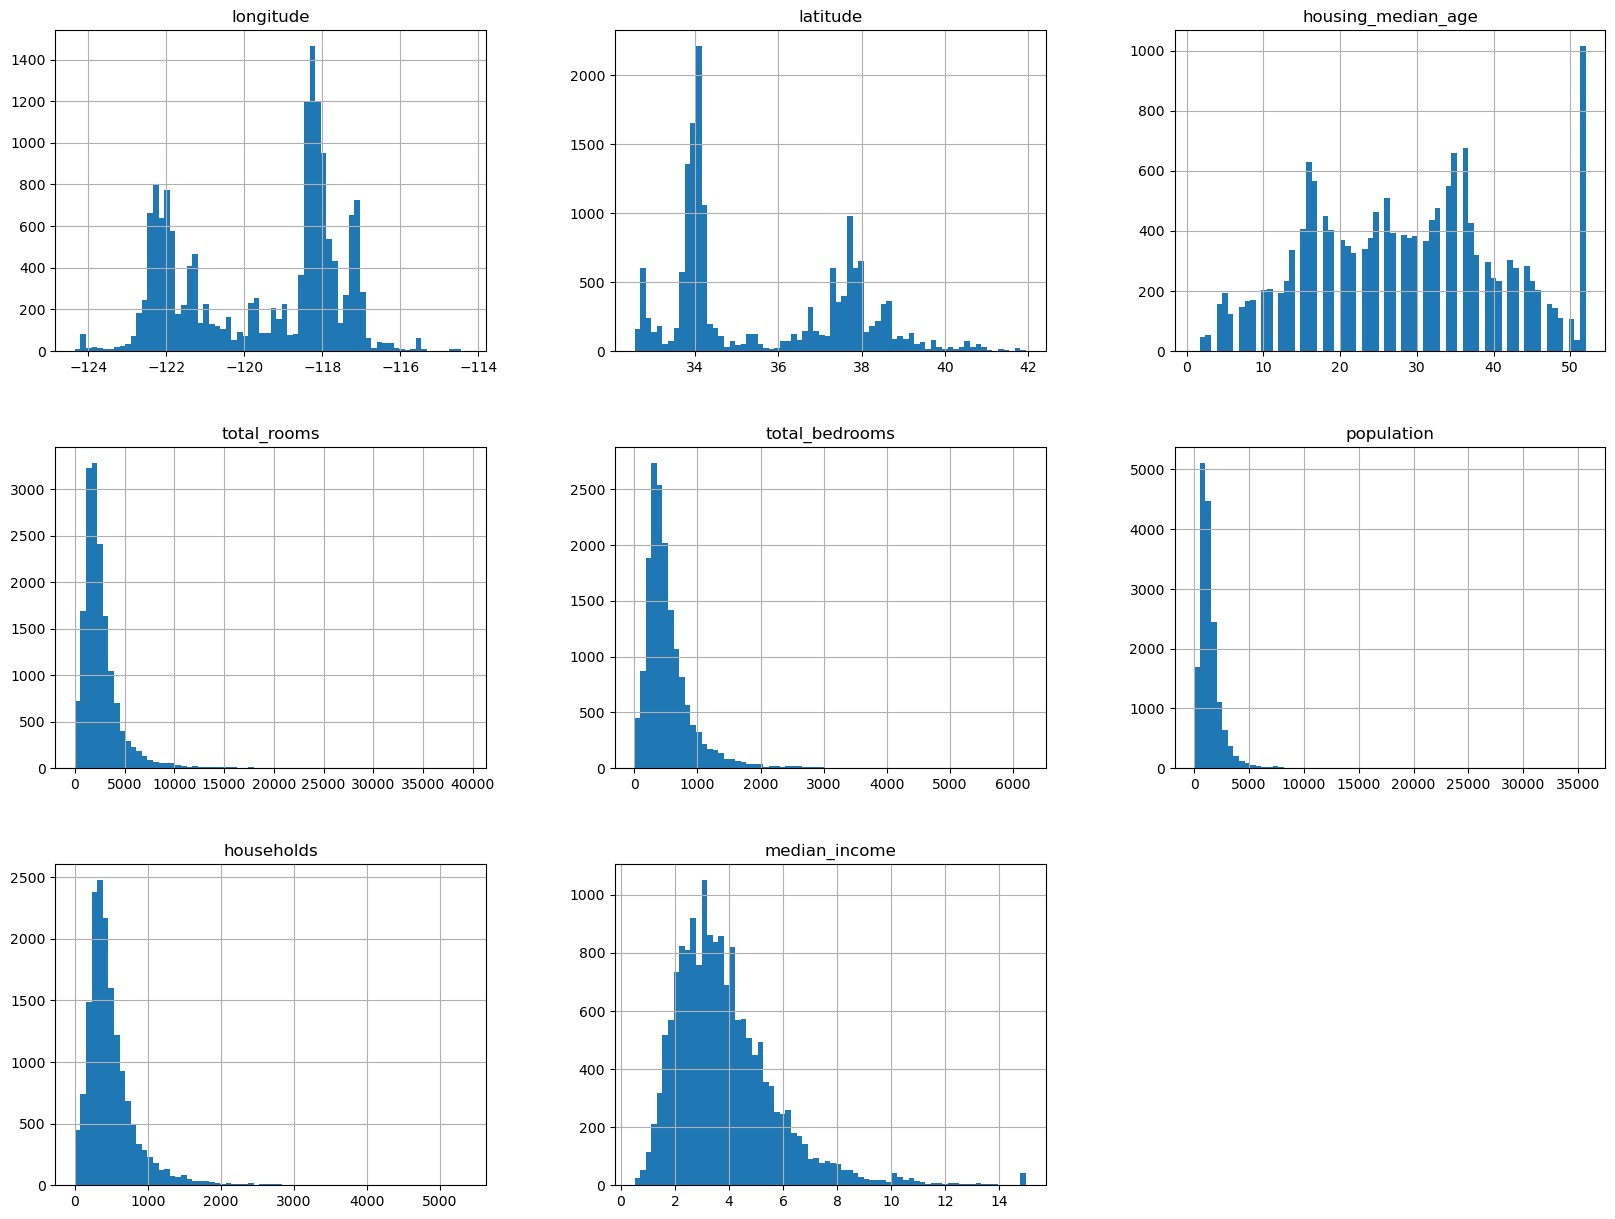

In [157]:
housing.hist(bins=70, figsize=(20,15))

<Axes: >

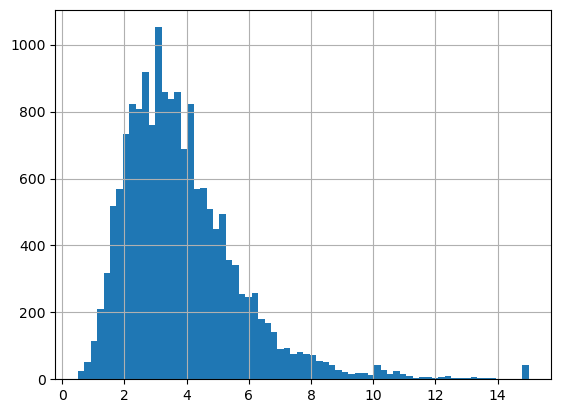

In [28]:
housing["median_income"].hist(bins=70)

## geographic data

<Axes: xlabel='longitude', ylabel='latitude'>

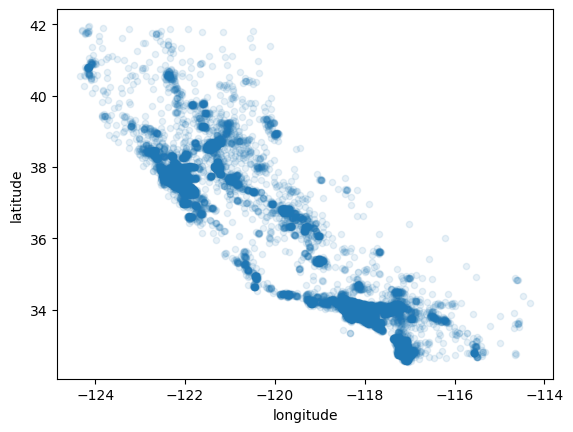

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

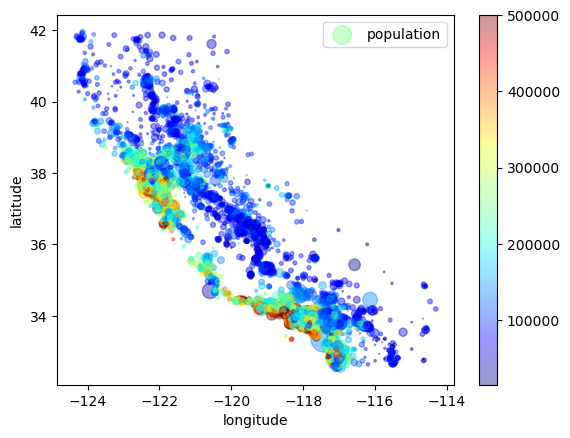

In [45]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
            c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

In [48]:
housing.drop("ocean_proximity", axis=1, inplace=True)


In [49]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924608,-0.108986,0.045841,0.069759,0.101221,0.054936,-0.013133,-0.046828
latitude,-0.924608,1.000000,0.010915,-0.034966,-0.065247,-0.108894,-0.069864,-0.080342,-0.142510
housing_median_age,-0.108986,0.010915,1.000000,-0.365196,-0.324779,-0.298327,-0.306373,-0.122648,0.103698
total_rooms,0.045841,-0.034966,-0.365196,1.000000,0.930373,0.854731,0.917412,0.198156,0.130433
total_bedrooms,0.069759,-0.065247,-0.324779,0.930373,1.000000,0.875767,0.978739,-0.009136,0.046029
population,0.101221,-0.108894,-0.298327,0.854731,0.875767,1.000000,0.906446,0.004324,-0.027691
households,0.054936,-0.069864,-0.306373,0.917412,0.978739,0.906446,1.000000,0.011967,0.061899
median_income,-0.013133,-0.080342,-0.122648,0.198156,-0.009136,0.004324,0.011967,1.000000,0.688130
median_house_value,-0.046828,-0.142510,0.103698,0.130433,0.046029,-0.027691,0.061899,0.688130,1.000000


<Axes: >

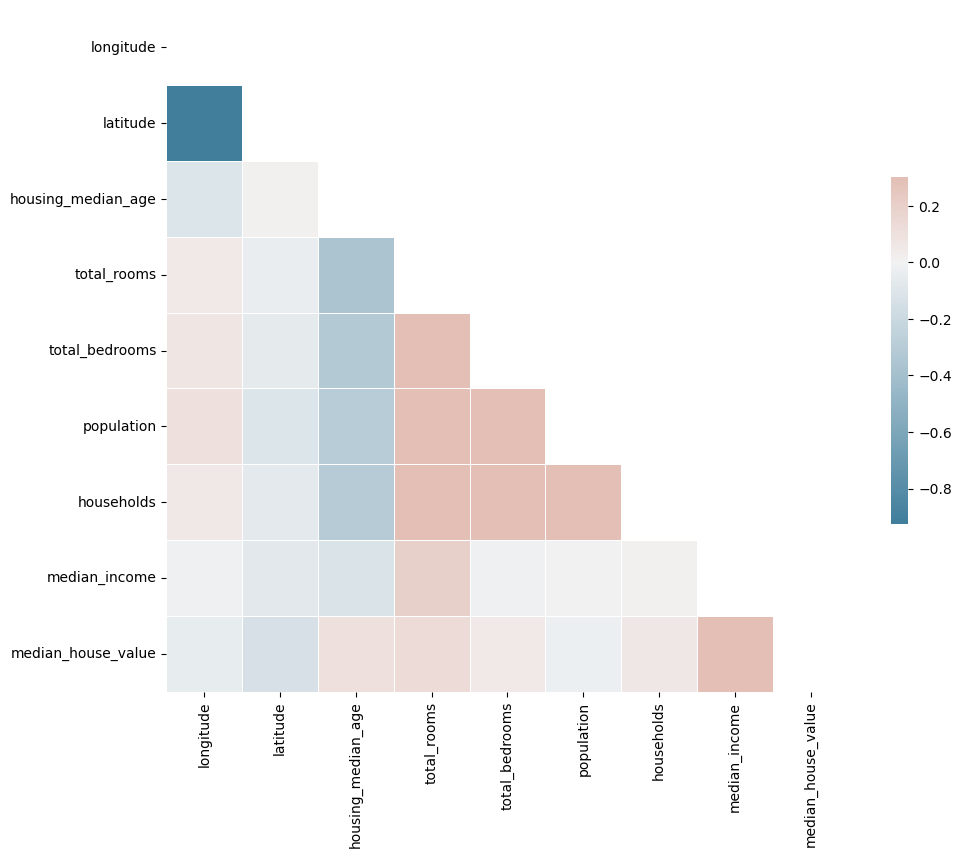

In [52]:
import seaborn as sns

corr=housing.corr()
mask= np.triu(np.ones_like(corr,dtype=bool))

f, ax= plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidth=0.5, cbar_kws={"shrink": 0.5})

# preparing data for machine learning

In [66]:
housing=strat_train_set.drop("median_house_value", axis=1)
housing_label=strat_train_set["median_house_value"].copy()

In [67]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 19117 to 749
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16353 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.8+ MB


In [63]:
housing_label.info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 19117 to 749
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 774.0 KB


## dealing with missing values

In [69]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")

housing_num=housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19117,-122.64,38.23,52.0,2156.0,469.0,1070.0,467.0,3.3011
10132,-117.91,33.91,27.0,2181.0,501.0,1555.0,488.0,3.6106
10557,-117.70,33.63,16.0,4428.0,745.0,1525.0,682.0,5.2325
10894,-117.86,33.72,37.0,1429.0,428.0,2089.0,399.0,3.4130
4167,-118.20,34.10,30.0,3643.0,1197.0,4336.0,1163.0,2.0700
...,...,...,...,...,...,...,...,...
10537,-117.70,33.50,4.0,7474.0,1037.0,2969.0,1007.0,8.7591
7289,-118.22,33.98,32.0,2643.0,737.0,2784.0,711.0,2.5352
15896,-122.39,37.72,28.0,1609.0,340.0,1064.0,290.0,1.1125
2772,-115.96,33.30,27.0,322.0,81.0,112.0,57.0,1.1250


In [70]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [72]:
x = imputer.transform(housing_num)
x

array([[-1.2264e+02,  3.8230e+01,  5.2000e+01, ...,  1.0700e+03,
         4.6700e+02,  3.3011e+00],
       [-1.1791e+02,  3.3910e+01,  2.7000e+01, ...,  1.5550e+03,
         4.8800e+02,  3.6106e+00],
       [-1.1770e+02,  3.3630e+01,  1.6000e+01, ...,  1.5250e+03,
         6.8200e+02,  5.2325e+00],
       ...,
       [-1.2239e+02,  3.7720e+01,  2.8000e+01, ...,  1.0640e+03,
         2.9000e+02,  1.1125e+00],
       [-1.1596e+02,  3.3300e+01,  2.7000e+01, ...,  1.1200e+02,
         5.7000e+01,  1.1250e+00],
       [-1.2205e+02,  3.7680e+01,  3.2000e+01, ...,  1.0190e+03,
         3.4000e+02,  6.1104e+00]])

In [77]:
housing_tr= pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 19117 to 749
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [79]:
imputer.strategy

'median'

## encoding categorical data

In [83]:
housing_cat= housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
19117,<1H OCEAN
10132,<1H OCEAN
10557,<1H OCEAN
10894,<1H OCEAN
4167,<1H OCEAN
...,...
10537,<1H OCEAN
7289,<1H OCEAN
15896,NEAR BAY
2772,INLAND


In [98]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder= OneHotEncoder(sparse_output=False)
housing_cat_1hot= cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## Feature engineering

In [100]:
def feature_engineering(data):
    data["bedrooms_per_household"]= data["total_bedrooms"]/data["households"]
    data["population_per_household"]= data["population"]/data["households"]
    data["rooms_per_household"]= data["total_rooms"]/data["households"]
    return data

In [104]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
19117,-122.64,38.23,52.0,2156.0,469.0,1070.0,467.0,3.3011,1.004283,2.291221,4.616702
10132,-117.91,33.91,27.0,2181.0,501.0,1555.0,488.0,3.6106,1.026639,3.186475,4.469262
10557,-117.70,33.63,16.0,4428.0,745.0,1525.0,682.0,5.2325,1.092375,2.236070,6.492669
10894,-117.86,33.72,37.0,1429.0,428.0,2089.0,399.0,3.4130,1.072682,5.235589,3.581454
4167,-118.20,34.10,30.0,3643.0,1197.0,4336.0,1163.0,2.0700,1.029235,3.728289,3.132416
...,...,...,...,...,...,...,...,...,...,...,...
10537,-117.70,33.50,4.0,7474.0,1037.0,2969.0,1007.0,8.7591,1.029791,2.948361,7.422046
7289,-118.22,33.98,32.0,2643.0,737.0,2784.0,711.0,2.5352,1.036568,3.915612,3.717300
15896,-122.39,37.72,28.0,1609.0,340.0,1064.0,290.0,1.1125,1.172414,3.668966,5.548276
2772,-115.96,33.30,27.0,322.0,81.0,112.0,57.0,1.1250,1.421053,1.964912,5.649123


## scaling our data

In [105]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

housing_scaled= scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-1.53882878,  1.22131381,  1.8562235 , ..., -0.19028783,
        -0.07017476, -0.32045724],
       [ 0.82252413, -0.80092753, -0.12726418, ..., -0.14487653,
         0.00709387, -0.37836906],
       [ 0.92736221, -0.93199873, -0.99999876, ..., -0.01135237,
        -0.07493472,  0.41638871],
       ...,
       [-1.41402154,  0.98257699, -0.04792468, ...,  0.15122307,
         0.04873715,  0.04544815],
       [ 1.79602057, -1.0864755 , -0.12726418, ...,  0.65626263,
        -0.09833813,  0.08505902],
       [-1.2442837 ,  0.96385253,  0.26943335, ..., -0.33041855,
        -0.0092545 ,  0.19399626]])

## pipeline

In [113]:
housing=strat_train_set.drop("median_house_value", axis=1)
housing_label=strat_train_set["median_house_value"].copy()
def data_transformation(data):
    
    ### Seprate labels if they exist ###
    if "median_house_value" in data.columns:
        labels= data["median_house_value"]
        data= data.drop("median_house_value", axis=1)
    else:
        labels=None

    ### Feature Engineering ###
    feature_engineered_data= feature_engineering(data)
    features= list(feature_engineered_data.columns)   #creating a list of features for future use
    
    ### Imputing data ###
    from sklearn.impute import SimpleImputer
    imputer= SimpleImputer(strategy="median")
    housing_num=feature_engineered_data.select_dtypes(include=[np.number])
    imputed=imputer.fit_transform(housing_num)

    ### encoding categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder= OneHotEncoder(sparse_output=False)
    housing_cat_1hot= cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity")

    ### scaling numerical data ###
    from sklearn.preprocessing import StandardScaler
    scaler= StandardScaler()
    housing_scaled= scaler.fit_transform(imputed)

    ### concating all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features

# Select and Train model

In [122]:
train_data, train_labels,features = data_transformation(strat_train_set)

In [117]:
test_data, test_labels,features = data_transformation(strat_test_set)

## Linear regression 

In [124]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(train_data, train_labels)

LinearRegression()

In [125]:
# comparing some of our prediction with test data
original_values= test_labels[:10]
predicted_values= lin_reg.predict(test_data[:10])

comparison_df= pd.DataFrame(data={"Original values":original_values, "Predicted values":predicted_values,
                                 "difference":(original_values-predicted_values)})

In [127]:
comparison_df

,Original values,Predicted values,difference
13882,99300.0,92420.534509,6879.465491
6986,224300.0,260391.587571,-36091.587571
8687,283800.0,299087.620191,-15287.620191
4596,158900.0,126546.025040,32353.974960
10575,302000.0,329524.211692,-27524.211692
14305,100000.0,149451.924218,-49451.924218
5338,360200.0,239528.397355,120671.602645
15614,500001.0,270012.008574,229988.991426
16886,500001.0,327529.565389,172471.434611
19121,151600.0,244554.137485,-92954.137485


In [128]:
from sklearn.metrics import mean_squared_error
lin_mse= mean_squared_error(original_values,predicted_values)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

105677.3083958756

In [129]:
from sklearn.metrics import mean_absolute_error
lin_mae=mean_absolute_error(original_values,predicted_values)
lin_mae

78367.49502900483

In [158]:
lin_scores= cross_val_score(lin_reg,train_data, train_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68335.19247048 68039.0017681  68343.9809374  71275.33014808
 70004.5902327  72962.85519482 69759.75174152 65287.80387779
 65385.04131306 67009.40660925]
Mean: 68640.29542931996
Standard deviation: 2319.06306747781


## Decision Tree Regression

In [131]:
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor(random_state=15)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=15)

In [138]:
tree_predictions= tree_reg.predict(train_data)
tree_mse= mean_squared_error(train_labels,tree_predictions)
tree_rmse= np.sqrt(tree_mse)
tree_rmse

0.0

In [139]:
tree_mae=mean_absolute_error(train_labels,tree_predictions)
tree_mae

0.0

In [149]:
#K-fold cross validation
from sklearn.model_selection import cross_val_score
tree_scores=cross_val_score(tree_reg,train_data,train_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-tree_scores)

In [144]:
def display_scores(input):
    print("Scores:", input)
    print("Mean:", input.mean())
    print("Standard deviation:", input.std())

In [150]:
display_scores(tree_rmse_scores)

Scores: [71706.03968564 71084.83048254 69089.79456608 71946.73073042
 69334.09890723 73501.6494476  73842.58562653 67217.07620668
 69937.14091946 66623.71245625]
Mean: 70428.36590284278
Standard deviation: 2312.770215223921


## Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor
forest_reg= RandomForestRegressor(n_estimators=100, random_state=15)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=15)

In [146]:
forest_predictions= forest_reg.predict(train_data)
forest_mse= mean_squared_error(train_labels,forest_predictions)
forest_rmse= np.sqrt(forest_mse)
forest_rmse

18641.639052130547

In [156]:
forest_scores=cross_val_score(forest_reg,train_data,tarin_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49905.16095464 50838.1319862  47587.12877276 52897.13440514
 50527.30998699 50455.1186934  53935.45995571 47098.62557708
 49923.22551409 49064.12461028]
Mean: 50223.14204562872
Standard deviation: 1992.5269329522166


# Fine Tuning

## Grid Search

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid= [
    {"n_estimators":[3,10,30,60], "max_features":[2,4,6,8,10]},
    {"bootstrap":[False],"n_estimators":[3,10,30], "max_features":[2,3,4]}
]
forest_reg= RandomForestRegressor(random_state=15)

grid_search= GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=15),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 60]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [164]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 60}

In [165]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=60, random_state=15)

In [166]:
cvres= grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64133.42620523152 {'max_features': 2, 'n_estimators': 3}
55330.96810773947 {'max_features': 2, 'n_estimators': 10}
52517.84211597404 {'max_features': 2, 'n_estimators': 30}
51899.38613047703 {'max_features': 2, 'n_estimators': 60}
59974.36840768808 {'max_features': 4, 'n_estimators': 3}
51708.12746407259 {'max_features': 4, 'n_estimators': 10}
49752.062077724775 {'max_features': 4, 'n_estimators': 30}
49141.73515801633 {'max_features': 4, 'n_estimators': 60}
58525.56592040807 {'max_features': 6, 'n_estimators': 3}
51097.08389273757 {'max_features': 6, 'n_estimators': 10}
49398.25434490917 {'max_features': 6, 'n_estimators': 30}
49020.647457250445 {'max_features': 6, 'n_estimators': 60}
57717.45843775457 {'max_features': 8, 'n_estimators': 3}
51879.59103941149 {'max_features': 8, 'n_estimators': 10}
49959.60644027026 {'max_features': 8, 'n_estimators': 30}
49538.75062395533 {'max_features': 8, 'n_estimators': 60}
58424.95914727388 {'max_features': 10, 'n_estimators': 3}
52206.7021272461

## Feature Importance

In [167]:
feature_importance= grid_search.best_estimator_.feature_importances_
feature_importance

array([8.35101136e-02, 7.59990059e-02, 4.07522935e-02, 1.83143290e-02,
       1.66772151e-02, 1.71119502e-02, 1.55238119e-02, 3.47483252e-01,
       2.41708747e-02, 1.04193176e-01, 8.07996420e-02, 1.60238574e-02,
       1.47722595e-01, 1.97434483e-04, 4.56426301e-03, 6.95618640e-03])

In [168]:
feature_importance_list= list(zip(features,feature_importance.tolist()))
feature_importance_list

[('longitude', 0.08351011361796652),
 ('latitude', 0.07599900587112933),
 ('housing_median_age', 0.04075229352496141),
 ('total_rooms', 0.01831432904494462),
 ('total_bedrooms', 0.01667721512923747),
 ('population', 0.017111950158907634),
 ('households', 0.015523811902985928),
 ('median_income', 0.3474832520473428),
 ('bedrooms_per_household', 0.02417087471016639),
 ('population_per_household', 0.10419317620967264),
 ('rooms_per_household', 0.08079964200943915),
 ('<1H OCEAN', 0.016023857360414548),
 ('INLAND', 0.14772259451697806),
 ('ISLAND', 0.00019743448330883473),
 ('NEAR BAY', 0.004564263010497466),
 ('NEAR OCEAN', 0.0069561864020472935)]

<BarContainer object of 16 artists>

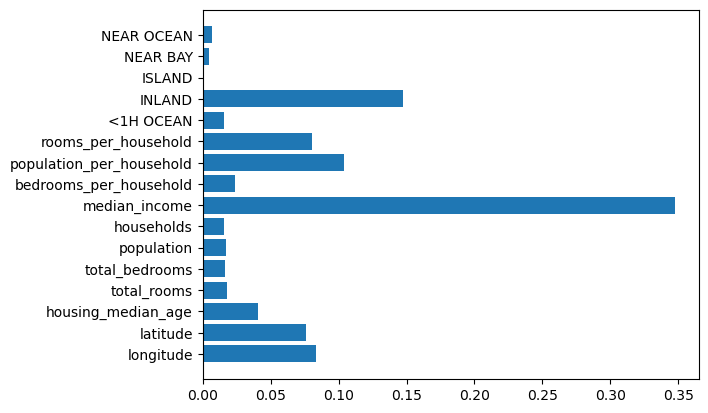

In [171]:
plt.barh(y=features, width=feature_importance.tolist())

# Final Prediction

In [172]:
final_model= grid_search.best_estimator_
final_predictions=final_model.predict(test_data)
final_mse= mean_squared_error(test_labels, final_predictions)
final_rmse=np.sqrt(final_mse)

In [173]:
final_rmse

63049.77052465799